# Bitcoin Asia Session vs. Europe/US session

- This theory started sometime in the beginning of the bull-run of 2020 in the late summer/ early fall on Crypto Twitter. It seemed to be a common trend that Bitcoin would rise in price during the Europe and US sessions of the day, and then during night time (i.e., the Asia session) the market would drastically sell-off. 

- The question is whether this theory is true, that the Asia session is more bearish and tends to sell-off more than the Europe/US sessions? 

In [1]:
import pandas as pd 
import numpy as np 

import requests
import arrow
import datetime

import warnings
warnings.filterwarnings('ignore')

# Import the plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline 

In [2]:
def get_quote_data(symbol='BTC-USD', data_range='700d', data_interval='60m'):
    res = requests.get('https://query1.finance.yahoo.com/v8/finance/chart/{symbol}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = res.json()
    body = data['chart']['result'][0]    
    dt = datetime.datetime
    dt = pd.Series(map(lambda x: arrow.get(x).to('Asia/Tokyo').datetime.replace(tzinfo=None), body['timestamp']), name='Datetime')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])    
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['Open', 'High','Low','Close','Volume']    #Renaming columns in pandas
    
    return df

In [114]:
btc = get_quote_data('BTC-USD', '699d', '60m') #import hourly data for Bitcoin from Yahoo Finance
print(btc[:5])

                            Open         High          Low        Close  \
Datetime                                                                  
2019-04-10 08:00:00  5206.129883  5222.759766  5188.859863  5201.299805   
2019-04-10 09:00:00  5196.149902  5224.180176  5179.180176  5211.109863   
2019-04-10 10:00:00  5211.589844  5250.470215  5210.640137  5237.890137   
2019-04-10 11:00:00  5238.609863  5244.810059  5233.439941  5236.930176   
2019-04-10 12:00:00  5238.180176  5241.890137  5226.069824  5226.910156   

                         Volume  
Datetime                         
2019-04-10 08:00:00         0.0  
2019-04-10 09:00:00         0.0  
2019-04-10 10:00:00  12664392.0  
2019-04-10 11:00:00   7609958.0  
2019-04-10 12:00:00   4633394.0  


In [115]:
btc['Pct_Change'] = btc['Close'].pct_change() * 100

In [116]:
btc = btc.loc['2020-07-01':] # as the theory started in July/August we'll slice the data from that date and forward

Text(0.5, 1.0, 'Bitcoin Chart')

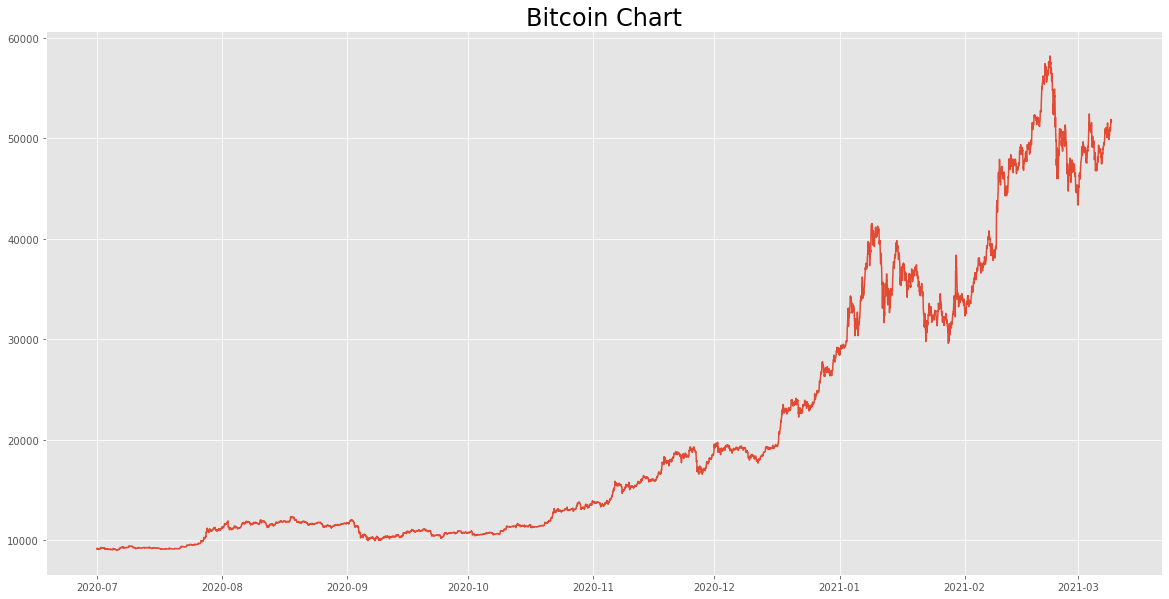

In [138]:
f, ax = plt.subplots(figsize=(20,10)) 

ax.plot(btc['Close'])
ax.set_title('Bitcoin Chart', fontsize=24)

Text(0.5, 1.0, 'Bitcoin Hourly Returns')

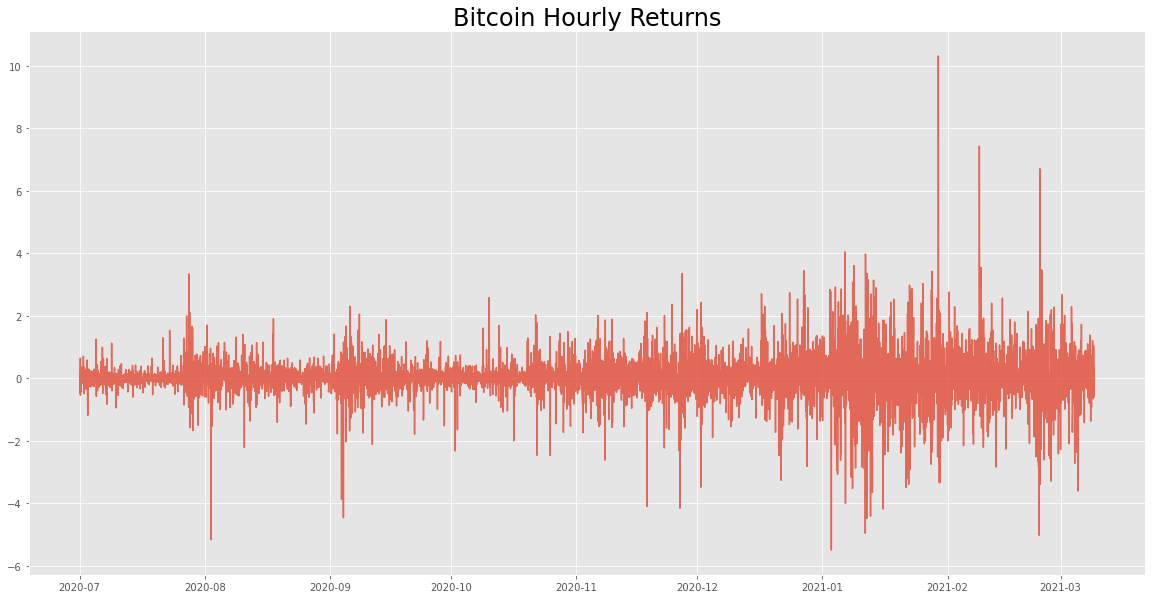

In [137]:
f, ax = plt.subplots(figsize=(20,10)) 

ax.plot(btc['Pct_Change'], alpha=.8)
ax.set_title('Bitcoin Hourly Returns', fontsize=24)

In [119]:
# Data preprocessing 

In [120]:
btc = btc.reset_index()

In [121]:
btc['Index'] = btc['Datetime'] #create a copy of Datetime Index

In [122]:
btc = btc.set_index('Datetime') #reset index

In [123]:
btc['Index']= btc['Index'].astype(str) #convert index data type to string for manipulation

In [124]:
btc.dtypes #make sure it converted

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Pct_Change    float64
Index          object
dtype: object

In [125]:
btc[['Date','Time']] = btc['Index'].str.split(" ", expand=True) # split the column in between date and time

In [126]:
btc.tail(1) # everything looks fine

,Open,High,Low,Close,Volume,Pct_Change,Index,Date,Time
Datetime,,,,,,,,,
2021-03-09 08:18:02,51728.578125,51728.578125,51728.578125,51728.578125,0.0,0.00438,2021-03-09 08:18:02,2021-03-09,08:18:02


In [127]:
# Create new columns for Timezone (Asia, Europe, US) depending on time of the day
# Data is based of Tokyo Asia time 

In [128]:
# Let's say the Asia Trading Session starts 8am Tokyo Time and goes one for 8 hours
btc['Time'] = btc['Time'].str.replace(r'08:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'09:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'10:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'11:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'12:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'13:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'14:00:00', 'ASIA')
btc['Time'] = btc['Time'].str.replace(r'15:00:00', 'ASIA')

In [129]:
# Do the same for the following 16 hours for Europe/US
btc['Time'] = btc['Time'].str.replace(r'16:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'17:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'18:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'19:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'20:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'21:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'22:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'23:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'00:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'01:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'02:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'03:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'04:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'05:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'06:00:00', 'EU_US')
btc['Time'] = btc['Time'].str.replace(r'07:00:00', 'EU_US')

In [130]:
# Check the df to make sure it's all converted correctly
btc['Time'].value_counts() #looks good, just need to remove the current time value

EU_US       4007
ASIA        1985
08:18:02       1
Name: Time, dtype: int64

In [131]:
btc = btc[:-1] #remove last row

In [132]:
btc = btc.rename(columns = {'Time':'Timezone'}) #rename time column to Timezone

Text(0.5, 1.0, 'Bitcoin Hourly Returns Asia vs. Europe and US session')

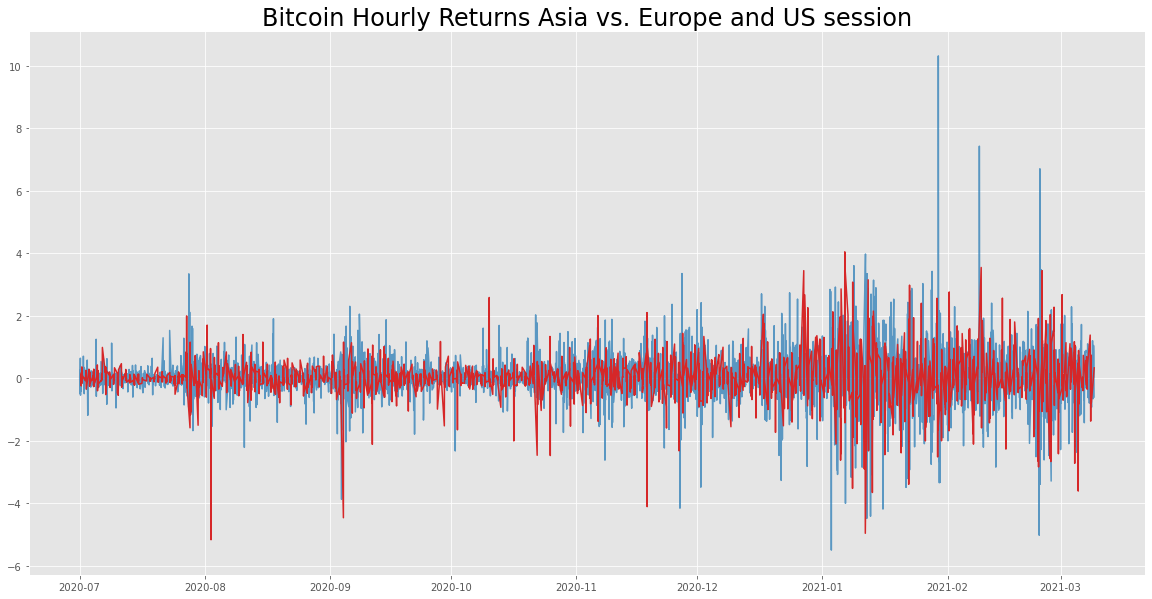

In [188]:
f, ax = plt.subplots(figsize=(20,10)) 

ax.plot(btc['Pct_Change'][btc['Timezone'] == 'EU_US'], alpha= .7, color ='tab:blue')
ax.plot(btc['Pct_Change'][btc['Timezone'] == 'ASIA'], alpha=1, color ='tab:red')

ax.set_title('Bitcoin Hourly Returns Asia vs. Europe and US session', fontsize=24)

In [175]:
btc['Pct_Change'].mean()

0.031749484701385264

In [177]:
mean_returns = btc['Pct_Change'].mean()
mean_asia_returns = btc['Pct_Change'][btc['Timezone'] == 'ASIA'].mean()
mean_EU_US_returns = btc['Pct_Change'][btc['Timezone'] == 'EU_US'].mean()

In [178]:
print(f' The Bitcoin Hourly Mean returns during the Asian Session is {mean_asia_returns}%')
print(f' The Bitcoin Hourly Mean returns during the European and American Session is {mean_EU_US_returns}%')
print(f' The Bitcoin hourly Mean returns for all sessions combined is {mean_returns}%')

 The Bitcoin Hourly Mean returns during the Asian Session is 0.001765235426365012%
 The Bitcoin Hourly Mean returns during the European and American Session is 0.04660317444705918%
 The Bitcoin hourly Mean returns for all sessions combined is 0.031749484701385264%


In [184]:
# create a df for plotting
data = {'Session': ['Asia', 'Europe/US', 'Combined'], 
        'Average Returns':[mean_asia_returns,mean_EU_US_returns,mean_returns]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Session,Average Returns
0,Asia,0.001765
1,Europe/US,0.046603
2,Combined,0.031749


In [185]:
df = df.set_index('Session')

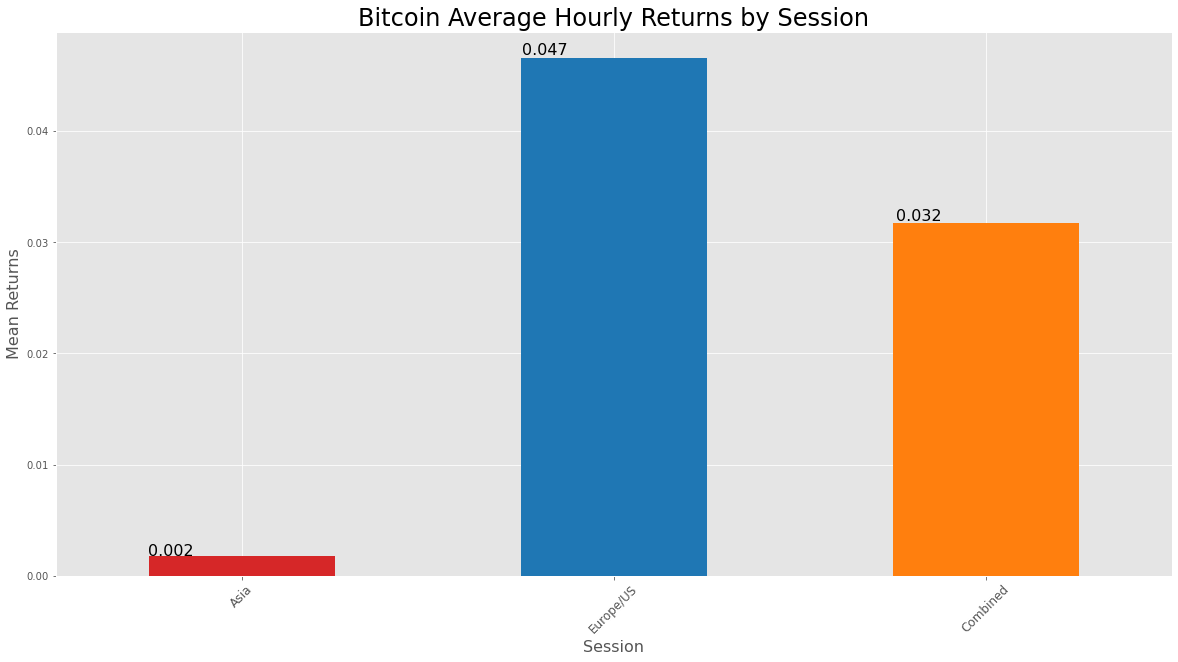

In [191]:
f,ax=plt.subplots(figsize=(20,10))

df['Average Returns'].plot.bar(color=['tab:red', 'tab:blue', 'tab:orange'])
ax.set_title('Bitcoin Average Hourly Returns by Session', fontsize = 24)
ax.set_xlabel('Session', fontsize = 16)
ax.set_ylabel('Mean Returns', fontsize = 16)
plt.xticks(rotation=45, fontsize = 12)

for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

In [144]:
btc['label'] = np.where(btc['Timezone'] == 'ASIA', 1, -1)

In [145]:
btc1 = btc.copy() # create copy of df to not mess with original one

Text(0.5, 1.0, 'BTC Price Chart (Green = Europe/US, Red = ASIA)')

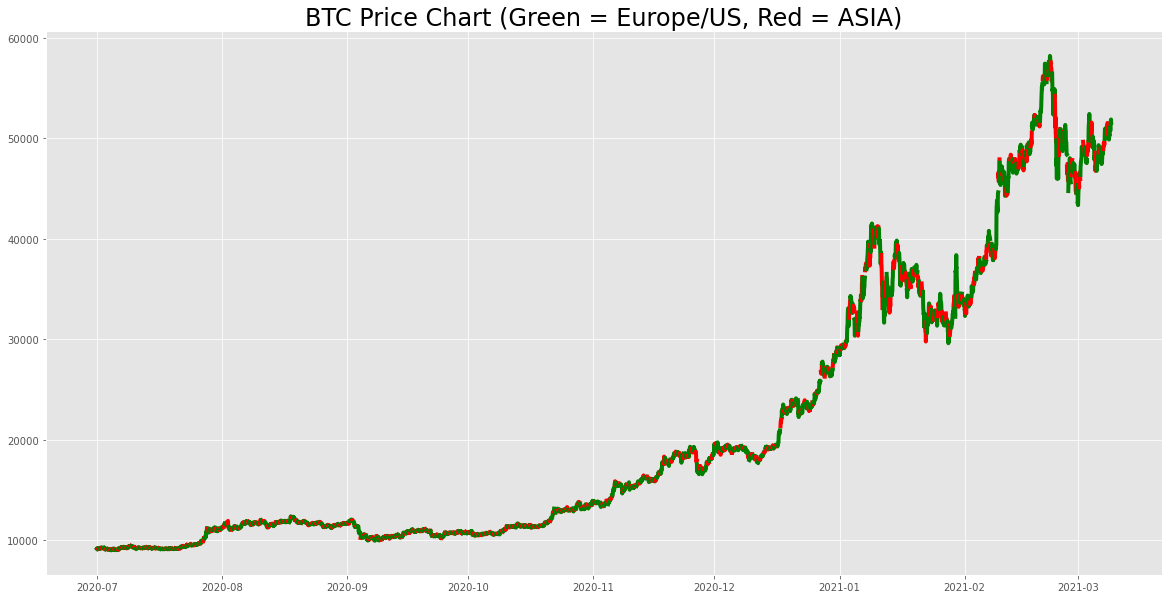

In [152]:
fig, ax = plt.subplots(figsize=(20,10))

def plot_func(group):
    global ax
    color = 'r' if (group['label'] == 1).any() else 'g'
    lw = 4.0
    ax.plot(group.index, group.Close, c=color, linewidth=lw)

btc1.groupby((btc1['label'].shift() * btc1['label'] < 0).cumsum()).apply(plot_func)

# add ma lines
#ax.plot(btc1.index, btc1['Open'], lw=6, alpha=.1,label='MA-50')
#ax.legend(loc='best')
ax.set_title('BTC Price Chart (Green = Europe/US, Red = ASIA)', fontsize=24)

In [ ]:
#Conclusion... Asia seems to sell-off more compared to EU/US sessions. 